# Step 1: Load the Wikipedia GLoVE Word2Vec.

In [1]:
import gensim.downloader as api

glove_vectors = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


# Step 2: Show how similar are these words:

In [2]:
similarity_btween_man_woman = glove_vectors.similarity('man', 'woman')
similarity_btween_chair_throne = glove_vectors.similarity('chair', 'throne')
similarity_btween_water_baby = glove_vectors.similarity('water', 'baby')

print(f"Similarity between 'man' & 'woman': {similarity_btween_man_woman:.4f}")
print(f"Similarity between 'chair' & 'throne': {similarity_btween_chair_throne:.4f}")
print(f"Similarity between 'water' & 'baby': {similarity_btween_water_baby:.4f}")


Similarity between 'man' & 'woman': 0.8323
Similarity between 'chair' & 'throne': 0.3001
Similarity between 'water' & 'baby': 0.4032


# Step 3: Using these provide analogies for the following:

In [3]:

king_woman = glove_vectors.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

princess_woman = glove_vectors.most_similar(positive=['woman', 'princess'], negative=['man'], topn=1)

adult_woman = glove_vectors.most_similar(positive=['woman', 'child'], negative=['adult'], topn=1)

print(f"{king_woman[0][0]} is to King as Woman is to Man ")
print(f"{princess_woman[0][0]} is to Princess as Man is to Woman ")
print(f"{adult_woman[0][0]} is to a woman as a child is to an adult")


queen is to King as Woman is to Man 
duchess is to Princess as Man is to Woman 
mother is to a woman as a child is to an adult


# 4 Multinomial Naive Bayes classifier

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:

messages = pd.read_csv("spam.csv", encoding='latin-1')


messages = messages[['v1', 'v2']]
messages.columns = ['label', 'message']

messages['label'] = messages['label'].map({'ham': 0, 'spam': 1})

X = messages['message']
y = messages['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Multinomial Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

y_pred = model.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# evaluation metrics
print("Accuracy is ", accuracy)
print("Confusion Matrix is \n", confusion)
print("Classification Report is \n", report)



Accuracy is  0.9825992387166939
Confusion Matrix is 
 [[1581    6]
 [  26  226]]
Classification Report is 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1587
           1       0.97      0.90      0.93       252

    accuracy                           0.98      1839
   macro avg       0.98      0.95      0.96      1839
weighted avg       0.98      0.98      0.98      1839



In [9]:
# confusion matrix
y_pred = model.predict(X_test_vectorized)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix of naive bayes:")
print(conf_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Confusion Matrix of naive bayes:
[[1581    6]
 [  26  226]]


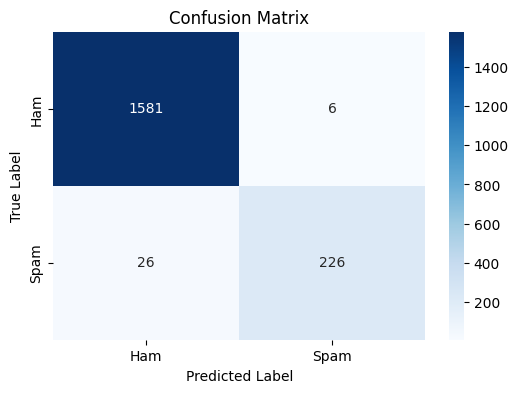

In [10]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
